In [14]:
from fiat_toolbox.equity.equity import Equity
import seaborn as sns

Use example for US where a FIAT calculation has already been run (aggregated_damage.csv) and data from census at a block level containing total population and income per capita are saved (population_income_data.csv)

In [2]:
# Input data
fiat_data = "../tests/equity/data/aggregated_damage.csv"
census_data = "../tests/equity/data/population_income_data.csv"
aggregation_label = "Census_Bg"
percapitalincome_label= "PerCapitaIncomeBG"
totalpopulation_label= "TotalPopulationBG"

We can then create an Equity object which will take care of merging the data

In [6]:
equity = Equity(
    census_data,
    fiat_data,
    aggregation_label,
    percapitalincome_label,
    totalpopulation_label,
)
equity.df

,Census_Bg,Total Damage (1Y),Total Damage (2Y),Total Damage (5Y),Total Damage (10Y),Total Damage (25Y),Total Damage (50Y),Total Damage (100Y),Risk (EAD),TotalPopulationBG,PerCapitaIncomeBG
0,000100-block1,0.00000,1.319125e+05,1.323959e+05,4.952925e+05,1.124594e+06,1.777442e+06,2.372217e+06,2.162935e+05,613,71098.0
1,000100-block2,0.00000,4.643685e+04,4.643685e+04,7.244588e+05,1.382805e+06,1.966670e+06,2.839213e+06,2.038593e+05,745,87167.0
2,000100-block3,236166.40210,7.384604e+05,7.457012e+05,1.363297e+06,1.820166e+06,2.702732e+06,3.516753e+06,7.570916e+05,623,113826.0
3,000200-block1,142796.35610,3.578472e+05,3.662416e+05,5.460090e+05,6.961518e+05,1.027554e+06,1.486769e+06,3.526250e+05,583,93651.0
4,000200-block2,0.00000,8.308005e+04,2.984962e+05,1.051642e+06,2.872314e+06,4.775011e+06,5.978366e+06,4.305955e+05,678,186091.0
...,...,...,...,...,...,...,...,...,...,...,...
254,005800-block2,97259.29398,1.406864e+05,2.286379e+05,2.829737e+05,1.183157e+06,1.294380e+07,3.553674e+07,8.894531e+05,1289,38879.0
255,005800-block3,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.798206e+04,5.340980e+06,7.774629e+04,3959,52481.0
256,005900-block1,0.00000,0.000000e+00,0.000000e+00,8.898831e+04,3.772143e+05,3.876295e+05,5.897553e+05,3.492832e+04,1271,58849.0
257,005900-block2,0.00000,7.377653e+04,7.377653e+04,8.023736e+04,8.421354e+04,1.024581e+05,1.264930e+05,5.528416e+04,3464,14507.0


We can then do an equity calculation using a gamma value

In [9]:
gamma = 1.2 # elasticity
df_equity = equity.equity_calculation(gamma)
df_equity

,Census_Bg,EW,EWCEAD
0,000100-block1,0.594808,1.302869e+05
1,000100-block2,0.465783,9.616665e+04
2,000100-block3,0.338155,2.581984e+05
3,000200-block1,0.427357,1.513494e+05
4,000200-block2,0.187472,8.183866e+04
...,...,...,...
254,005800-block2,1.227292,1.738953e+06
255,005800-block3,0.856255,6.759752e+04
256,005900-block1,0.746309,2.614349e+04
257,005900-block2,4.006016,2.216226e+05


We can then even check the difference between the standard EAD calculation and the equity weighted approach.

In [11]:
ranking = equity.rank_ewced()
ranking

,Census_Bg,rank_EAD,rank_EWCEAD,rank_diff
0,000100-block1,145,175,30
1,000100-block2,149,183,34
2,000100-block3,97,143,46
3,000200-block1,130,168,38
4,000200-block2,123,191,68
...,...,...,...,...
254,005800-block2,87,49,-38
255,005800-block3,184,195,11
256,005900-block1,204,210,6
257,005900-block2,192,153,-39


<Axes: xlabel='EW', ylabel='rank_diff'>

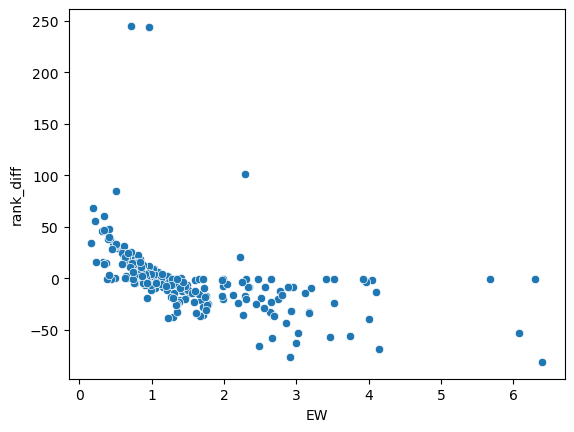

In [15]:
sns.scatterplot(equity.df, x="EW", y="rank_diff")

Or calculate a simple socioeconomic resilience index

In [12]:
sri = equity.calculate_resilience_index()
sri

,Census_Bg,SRI
0,000100-block1,1.660132
1,000100-block2,2.119855
2,000100-block3,2.932209
3,000200-block1,2.329873
4,000200-block2,5.261516
...,...,...
254,005800-block2,0.511488
255,005800-block3,1.150135
256,005900-block1,1.336024
257,005900-block2,0.249452
